### p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균 제곱 오차를 최소화하는 파라미터를 찾는다.
    - 파라미터를 줄이고 키우고를 반복한다(예시)
    - 오차를 파라미터로 미분한 값만큼 조절 반복(경사하강법)
    - 정규방적식으로 찾기(메모리 부족)
 - 평균제곱오차 : 오차(예측과 정답으 ㅣ차이)를 제곱 > 모든 샘플들으 ㅣ오차를 평균

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 키오 ㅏ몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
키 = [120,160,170,190]
몸무게_test = [65,80] # 이 두사람의 키는 어떻게 될까?

In [3]:
#4행 1열 /1행 4열
몸무게 = np.array(몸무게).reshape((-1,1))
키 = np.array(키)
몸무게_test=np.array(몸무게_test).reshape((-1,1))

In [6]:
#p76 모델 선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
 # y = w*x+b에서 w와 b를 조절하는 것

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([162.93333333, 180.53333333]))

In [8]:
lr.score(몸무게, 키) # 겨정계수

0.9928205128205129

In [10]:
# 계수 w와 절편 b
lr.coef_, lr.intercept_

(array([1.17333333]), 86.66666666666667)

In [70]:
url = 'https://finance.daum.net/domestic/kospi200'
url = 'file:///C:/Users/wtime/Downloads/%EC%BD%94%EC%8A%A4%ED%94%BC200%20_%20%EB%8B%A4%EC%9D%8C%20%EA%B8%88%EC%9C%B5.html'
tables = pd.read_html(url, index_col=0)

In [71]:
df = tables[1]
df.head()

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.86,▼0.41,-0.15%,22595,826900,318,84,-382
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557


In [72]:
#전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)

In [73]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [74]:
#min max 정규화 [0,1]
minnum = np.min(df, axis=0)
maxnum = np.max(df, axis=0)
df.norm = (df-minnum) / (maxnum-minnum)

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [75]:
#입력x와 출력y 분리
# x_0, x_1, x_2(아ㅐ첨자)
y = df.norm['종가']
x = df.norm.iloc[:, 1:]
x.shape, y.shape

((10, 7), (10,))

In [76]:
offset = 8 #train용 개수
X_train = x[-offset:] # 상수 Magic Number를 가능하면 사용하지 않는게 좋다
X_test = x[:-offset]
y_train = y[-offset:]
y_test = y[:-offset]

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lr.predict(x_test)

array([273.42089502, 282.4319801 ])

In [42]:
lr.score(x_test, y_test)

-456.7451707292072

In [43]:
y_test

일자
19.07.02    276.86
19.07.01    277.27
Name: 종가, dtype: float64

In [44]:
x_test

,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,
19.07.02,-0.41,-0.15,22595,826900,318,84,-382
19.07.01,-0.23,-0.08,74357,3446049,-214,1286,365


In [22]:
X=df.iloc[1:] # 오늘 데이터 제외
Y=df.iloc[:-1,0] # 가장 오래된 데이터와 종가 외의 컬럼 제외
X.shape, Y.shape

((9, 8), (9,))

In [23]:
X, Y

(              종가   전일비   등락률    거래량     거래대금  개인(억)  외국인(억)  기관(억)
 일자                                                                
 19.07.01  277.27 -0.23 -0.08  74357  3446049   -214    1286    365
 19.06.28  277.50 -0.25 -0.09  67598  2879563  -1802    3011  -1189
 19.06.27  277.75  2.22  0.81  66303  3357666  -4165    1837   2415
 19.06.26  275.53  0.25  0.09  58818  2636531   -712     157    557
 19.06.25  275.28 -0.30 -0.11  60506  2635188   -364     277    -12
 19.06.24  275.58  0.10  0.04  55539  2235175   -978   -1048   1966
 19.06.21  275.48 -0.53 -0.19  77279  3275700    538     206   -767
 19.06.20  276.01  0.70  0.25  55336  2417864  -1342    -434   1762
 19.06.19  275.31  3.95  1.46  69733  3134202  -4430    2876   1606, 일자
 19.07.02    276.86
 19.07.01    277.27
 19.06.28    277.50
 19.06.27    277.75
 19.06.26    275.53
 19.06.25    275.28
 19.06.24    275.58
 19.06.21    275.48
 19.06.20    276.01
 Name: 종가, dtype: float64)

In [51]:
#Train /Test용 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42)

In [77]:
#train으로 Linear Regression 모델 ift
#score 측정
#예측을 그래프로 시각화
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, -456.7451696885433)

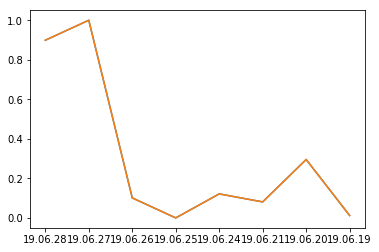

In [78]:
plt.plot(lr.predict(X_train))
plt.plot(y_train)

In [79]:
'''
train 셋으로 linear regression 모델 fit
78 릿지(ridge)모델 : w를 가능한한 작게 만드는 Linear regression -> 규제(regularization)
W를 줄인다는 것은 Y를 예측하는 데 가능한한 모든 특성을 반영해라
Y = w1 * x1 + w2 * x2 + ..... wi * xi + b
'''
from sklearn.linear_model import LinearRegression, Ridge
lr = Ridge().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)


(0.31578706606506557, -32.02192413210372)

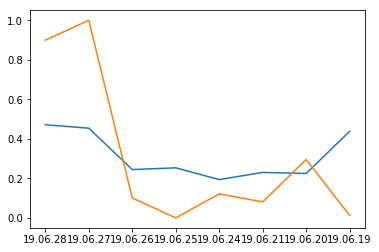

In [80]:
plt.plot(lr.predict(X_train))
plt.plot(y_train)

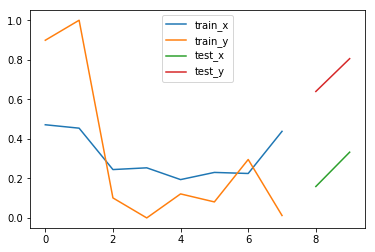

In [87]:
train_len = np.arange(len(X_train))
test_len=np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, lr.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, lr.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()